In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Covert Channel Detection Using Naive Bayes

In [2]:
# Two classes exist in this dataset: 1 and 0
# 1 = Covert packet
# 0 = Normal packet
dataset = pd.read_excel('Updated Final CovertTcp ACK Bounce Dataset.xlsx')
dataset.head(5)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum,tcp.checksum.dec,class
0,0,0,1275068417,0,1,1,0x000028b1,10417,1
1,0,0,1862270977,0,1,1,0x00003cac,15532,1
2,0,0,1912602625,0,1,1,0x0000b5b2,46514,1
3,0,0,1694498817,0,1,1,0x00003daf,15791,1
4,0,0,1828716545,0,1,1,0x00007dbb,32187,1


In [3]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum,tcp.checksum.dec,class
100393,101070734,101072194,2045994866,0,1,0,0x000048a9,18601,0
100394,101072194,101075114,2045994866,0,1,0,0x0000b853,47187,0
100395,2045994866,2045994866,101075114,0,1,0,0x0000aceb,44267,0
100396,101075114,101085334,2045994866,0,1,0,0x0000d4d7,54487,0
100397,2045994866,2045994866,101085334,0,1,0,0x0000aceb,44267,0


In [4]:
# Check if there are any nulls
dataset.isnull().sum(axis=0)
# No nulls detected

tcp.seq             0
tcp.nxtseq          0
tcp.ack             0
tcp.flags.syn       0
tcp.flags.ack       0
tcp.flags.reset     0
tcp.checksum        0
tcp.checksum.dec    0
class               0
dtype: int64

In [5]:
# Count the different types of packets
total_covert_packets = dataset [ dataset ['class'] == 1 ]
total_normal_packets = dataset [ dataset ['class'] == 0 ]
print(f'Total covert packets: {len(total_covert_packets)}')
print(f'Total normal packets: {len(total_normal_packets)}')

Total covert packets: 50199
Total normal packets: 50199


In [6]:
# Total packets in the dataset
print(len(dataset))

100398


In [7]:
# The checksum hexadecimal values are dropped
# Instead, the decimal values are used
dataset = dataset.drop(['tcp.checksum'], axis=1)

In [8]:
dataset.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec,class
0,0,0,1275068417,0,1,1,10417,1
1,0,0,1862270977,0,1,1,15532,1
2,0,0,1912602625,0,1,1,46514,1
3,0,0,1694498817,0,1,1,15791,1
4,0,0,1828716545,0,1,1,32187,1


In [9]:
dataset.head(5)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec,class
0,0,0,1275068417,0,1,1,10417,1
1,0,0,1862270977,0,1,1,15532,1
2,0,0,1912602625,0,1,1,46514,1
3,0,0,1694498817,0,1,1,15791,1
4,0,0,1828716545,0,1,1,32187,1


In [10]:
dataset.tail(5)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec,class
100393,101070734,101072194,2045994866,0,1,0,18601,0
100394,101072194,101075114,2045994866,0,1,0,47187,0
100395,2045994866,2045994866,101075114,0,1,0,44267,0
100396,101075114,101085334,2045994866,0,1,0,54487,0
100397,2045994866,2045994866,101085334,0,1,0,44267,0


In [11]:
# Ready for data visualisation
import seaborn as sns

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


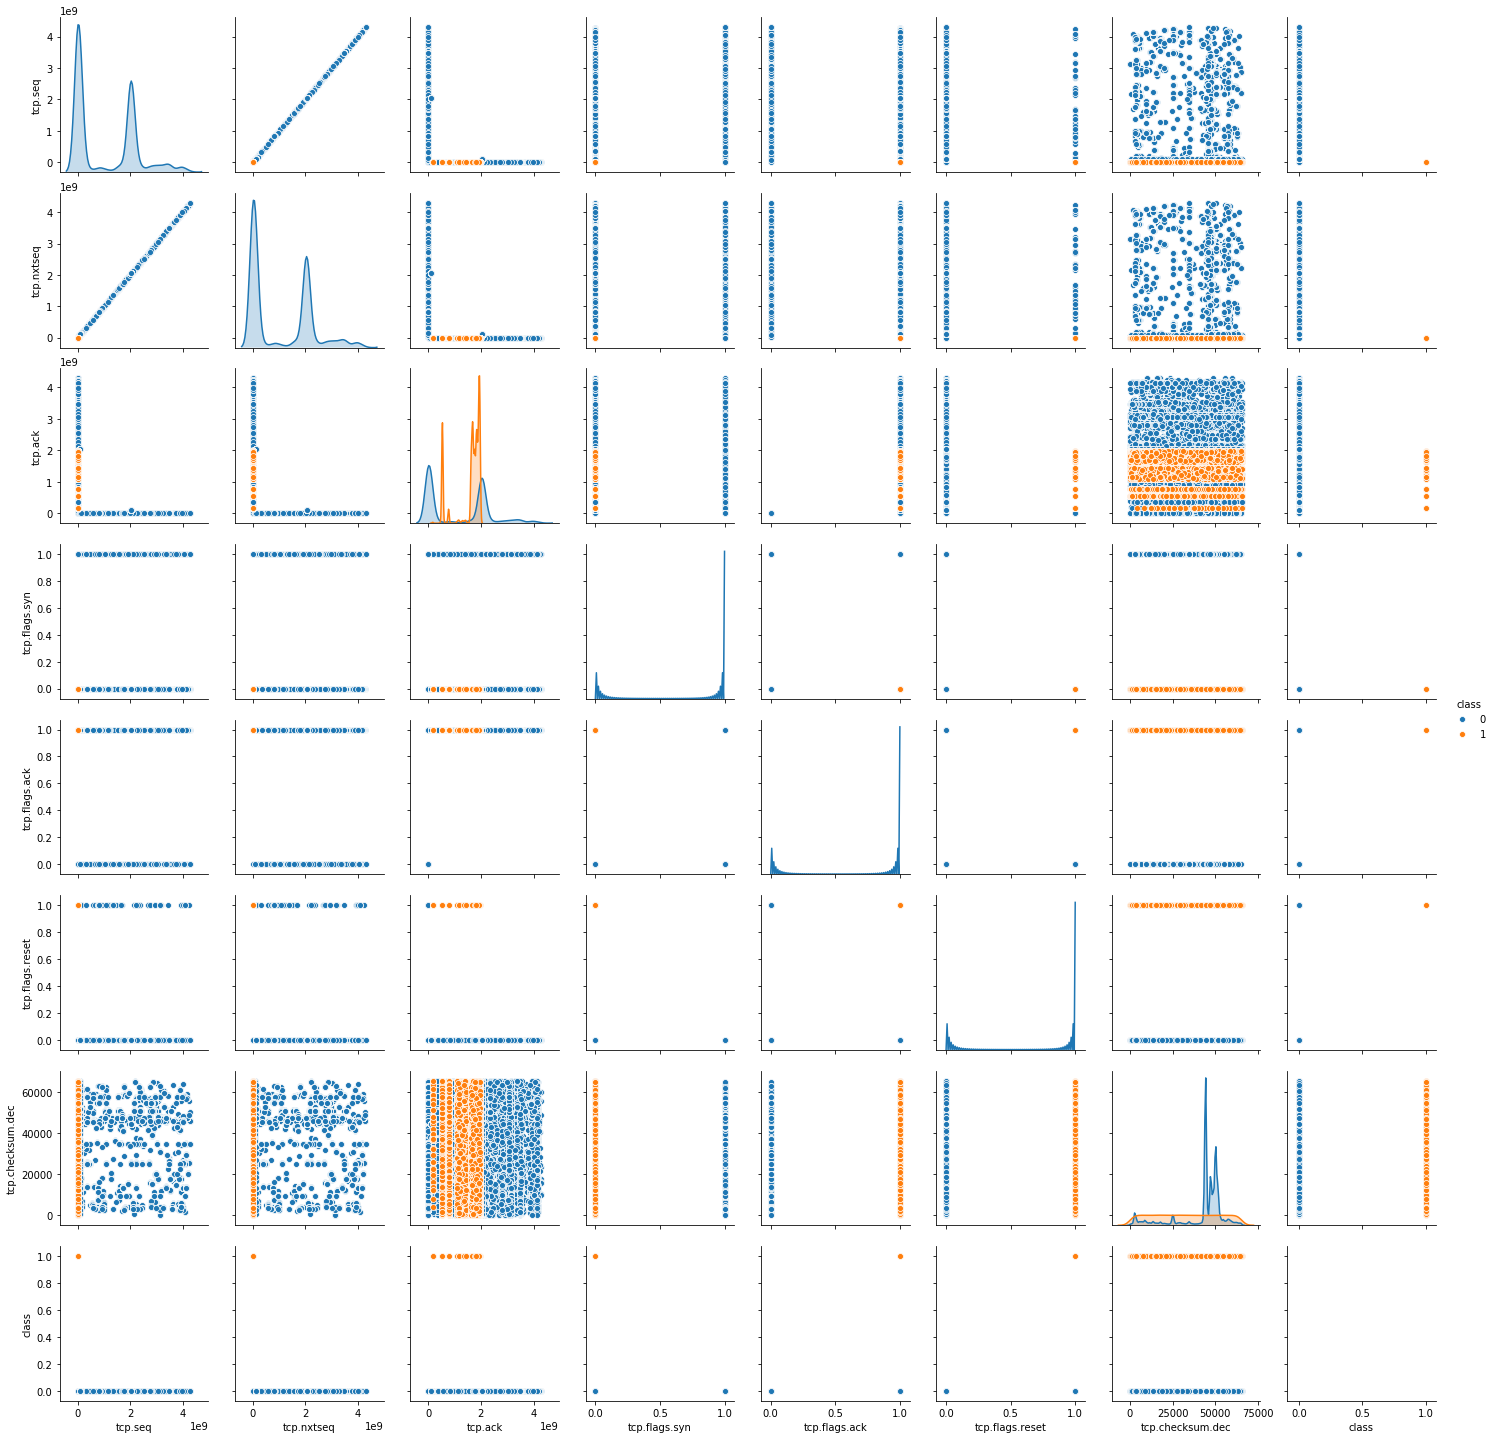

In [12]:
sns.pairplot(dataset, hue='class')

In [13]:
# Set the independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
# View the independent variables
X.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec
0,0,0,1275068417,0,1,1,10417
1,0,0,1862270977,0,1,1,15532
2,0,0,1912602625,0,1,1,46514
3,0,0,1694498817,0,1,1,15791
4,0,0,1828716545,0,1,1,32187


In [15]:
# Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [16]:
# Split the dataset into training and testing sets
# Stratify it so there is equal number of packets in the two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [17]:
# Check the size the datasets
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(75298, 7)
(25100, 7)

(75298,)
(25100,)


In [18]:
# Scale the variables for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

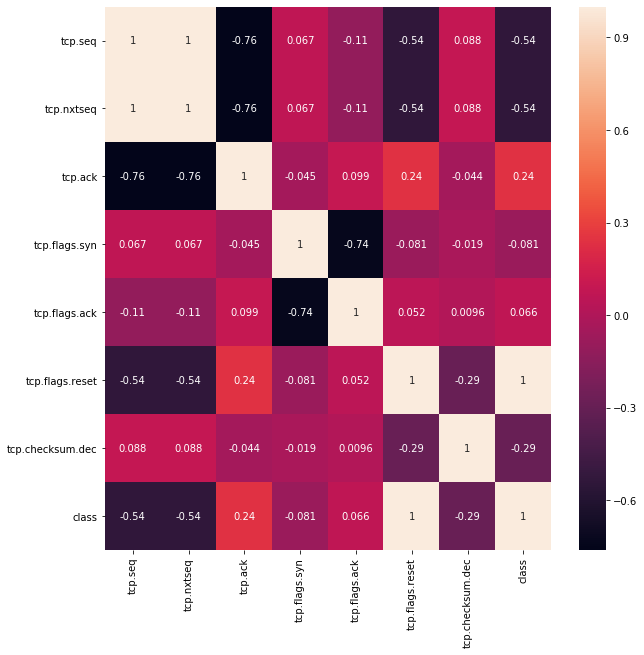

In [19]:
# Feature selection process
# Choose the best features for computation
# First, check the correlations between the features
plt.figure(figsize=(10,10))
correlation = dataset.corr()
ax = sns.heatmap(correlation, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax

In [21]:
# Use Naive Bayes to fit 
from sklearn.naive_bayes import GaussianNB

In [22]:
y_train

80870    0
14805    1
3910     1
19705    1
19464    1
        ..
76773    0
10113    1
96072    0
76457    0
54793    0
Name: class, Length: 75298, dtype: int64

In [23]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
# Predict the test data
y_predict = classifier.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 1]


In [25]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model score
score = classifier.score(X_test, y_test)
print(score, '%')

# Accuracy using the accuracy_score function from the sklearn.metrics
score = accuracy_score(y_test, y_predict)
print(score, '%')

# The quality of the predictions being made
report = classification_report(y_test, y_predict)
print(report)

# The confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

1.0 %
1.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12550
           1       1.00      1.00      1.00     12550

    accuracy                           1.00     25100
   macro avg       1.00      1.00      1.00     25100
weighted avg       1.00      1.00      1.00     25100

[[12550     0]
 [    0 12550]]


In [26]:
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y,cv=10, return_train_score=True)
print(f'KFold cross validation scores: {scores}')
avg = np.average(scores['test_score'])
print(f'Average score is {avg}')
print()

KFold cross validation scores: {'fit_time': array([0.03220725, 0.02244711, 0.0234251 , 0.02342415, 0.0244    ,
       0.02338886, 0.02243829, 0.02342391, 0.02343154, 0.02881312]), 'score_time': array([0.00195193, 0.0019803 , 0.00195265, 0.00195289, 0.00097609,
       0.00195217, 0.00198221, 0.00197577, 0.00194836, 0.00195241]), 'test_score': array([0.91593625, 0.84292829, 0.99661355, 0.99113546, 0.98814741,
       0.97589641, 0.98157371, 0.98994024, 0.9939243 , 0.99691174]), 'train_score': array([0.97360499, 0.98169504, 0.96325727, 0.96479559, 0.96441931,
       0.96572523, 0.96578056, 0.96409836, 0.96443038, 0.96349048])}
Average score is 0.9673007352935341



In [27]:
# Covert packet 
observation = [[0, 0, 1275068417, 0, 1, 1, 10417]]
scaled_observation = scaler.transform(observation)
print(scaled_observation)
print(classifier.predict(scaled_observation))

print()

# Another covert packet
observation = [[0, 0, 1828716545, 0, 1, 1, 32187]]
scaled_observation = scaler.transform(observation)
print(scaled_observation)
print(classifier.predict(scaled_observation))

[[-0.53669377 -0.53669528 -0.10014284 -0.07967632  0.06614441  0.99904426
  -1.59013697]]
[1]

[[-0.53669377 -0.53669528  0.5008159  -0.07967632  0.06614441  0.99904426
  -0.32033413]]
[1]


AUC is 1.0


Text(0.5, 1.0, 'ROC and AUC for Covert_TCP ACK Bounce Method')

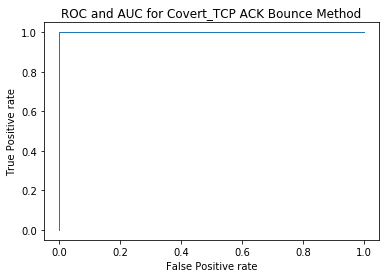

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities of the testing set
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC is {auc}')
plt.plot(fpr, tpr, linewidth=1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC and AUC for Covert_TCP ACK Bounce Method')